# Homework


Can you make a perfect classifier? Let's consider the next dataset:

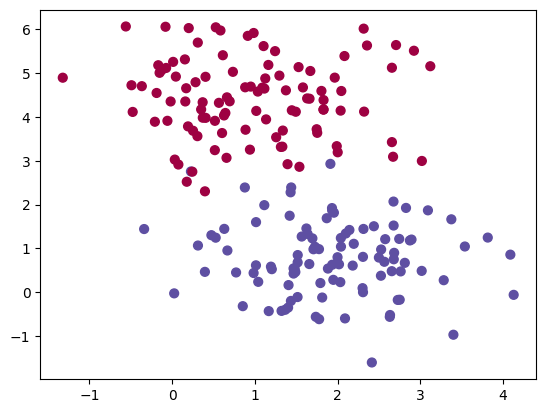

In [1]:
import numpy as np
import sklearn.datasets
from matplotlib import pyplot as plt
import time
from IPython import display

np.random.seed(0)
# X, y = sklearn.datasets.make_moons(200, noise=0.20)
X, y = sklearn.datasets.make_blobs(200, centers=2, cluster_std=0.9)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

#### 1. Try to tune the learning rate and number of iterations
*What is the lowest error with the current approach?*

Add early stopping to find the optimal number of iterations automatically.

Visualize the decision boundary

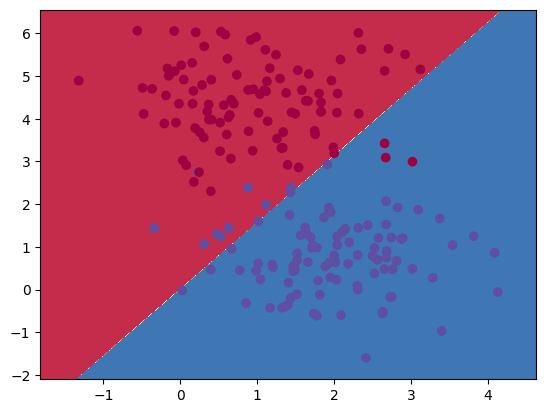

'Error:0.07'

'Final error: 0.065'

In [2]:
def perceptron(w, x):
    return activation(np.dot(x, w))

def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()

def activation(x):
    return np.where( x > 0 , 1, 0)

# initialize weights randomly with mean 0 - [-1; 1]
w = 2*np.random.random((2,)) - 1 

LR = 0.01
iterations = 100

last_error = 0
first_run = True
should_terminate_loop = False

for j in range(iterations):
    # get preds
    pred = perceptron(w, X)
    
    # how much did we miss?
    diff = y - pred
    current_error = np.mean(np.abs(diff))
    
    # 1. Try to tune the learning rate and number of iterations
    # check error before drawing
    if not first_run:
        print('Comparing errors. curent {} and previous {}'.format(current_error, last_error))
        if (current_error > last_error):
            print("Current error {} is greater than previous error {}".format(current_error, last_error))
            should_terminate_loop = True

    # draw result
    display.clear_output(wait=True)
    plot_decision_boundary(lambda x: perceptron(w, x))
    display.display("Error:" + str(current_error))
    time.sleep(0.5)
    
    # exit loop
    if should_terminate_loop:
        break;
    
    # update weights
    w = w + LR * np.dot(X.T, diff)
    first_run = False
    last_error = current_error

display.display("Final error: " + str(last_error))
# FINAL ERROR = 0.065

#### 2. It's time to add learnable bias
*What is the lowest error now?*

Visualize the decision boundary

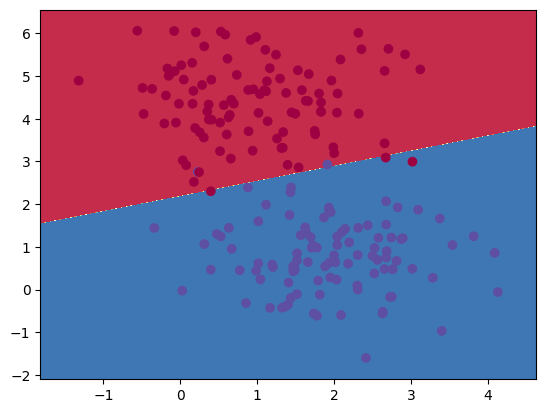

'Error:0.025'

'Final error: 0.025'

In [3]:
CONSTANT_VALUE = 5

def add_constant_column(matrix, constant_value):
    # Ensure the input is a NumPy array
    matrix = np.array(matrix)
    # Create a new column filled with the constant value
    constant_column = np.full((matrix.shape[0], 1), constant_value)
    # Add the constant column to the original matrix
    new_matrix = np.hstack((matrix, constant_column))
    return new_matrix

def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # adjust data with adding a constant column
    result_matrix = add_constant_column(np.c_[xx.ravel(), yy.ravel()], CONSTANT_VALUE)
    Z = pred_func(result_matrix)
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()
    
np.random.seed(0)
# X, y = sklearn.datasets.make_moons(200, noise=0.20)
X, y = sklearn.datasets.make_blobs(200, centers=2, cluster_std=0.9)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

# Add new column filled with constant to existing matrix
X =  add_constant_column(X, CONSTANT_VALUE)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

# initialize weights randomly with mean 0 - [-1; 1]
# change weights shape to (3,)
w = 2*np.random.random((3,)) - 1 

LR = 0.01
iterations = 10

last_error = 0

for j in range(iterations):
    # get preds
    pred = perceptron(w, X)
    
    # how much did we miss?
    diff = y - pred
    current_error = np.mean(np.abs(diff))
    
    # draw result
    display.clear_output(wait=True)
    plot_decision_boundary(lambda x: perceptron(w, x))
    display.display("Error:" + str(current_error))
    time.sleep(0.1)
    
    # update weights
    w = w + LR * np.dot(X.T, diff)
    last_error = current_error

display.display("Final error: " + str(last_error))

#### 3*. Let's expand it for three classes

**Idea:** we need to train weights for each class 

\begin{equation}
y_p =   \underset{c \,=\, 0,...,C-1}{\text{argmax}} \,\,\,\mathring{\mathbf{x}}_{p}^T \mathbf{w}_c^{\,}.
\end{equation}

Visualize the decision boundary

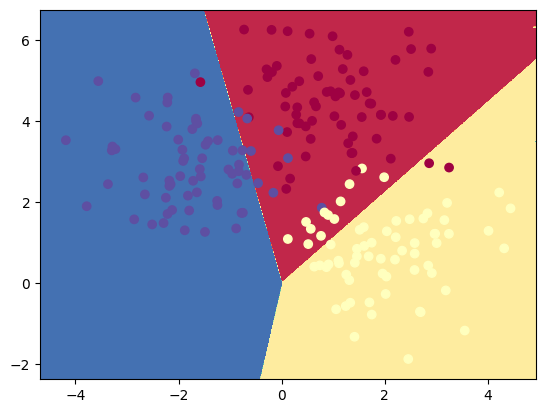

'Error:0.2749120276051985'

'Final error: 0.2749120276051985'

In [32]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    
    # take max 
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()
    
def activation(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Define prediction function
def predict(X, w):
    return activation(np.dot(X, w))

# Calculate error
def calculate_error(y, pred):
    m = y.shape[0]
    log_likelihood = -np.log(pred[range(m), y])
    return np.sum(log_likelihood) / m

# Update weight
def update_weights(X, y, pred, w, learning_rate):
    m = X.shape[0]
    y_one_hot = np.zeros((m, np.max(y) + 1))
    y_one_hot[range(m), y] = 1
    grad = np.dot(X.T, (pred - y_one_hot)) / m
    w -= learning_rate * grad
    return w
    
np.random.seed(0)
X, y = sklearn.datasets.make_blobs(200)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

# Initialize weights
w = 2 * np.random.random((2, 3)) - 1

LR = 1
iterations = 10
last_error = 0

# Training loop
for i in range(iterations):
    pred = predict(X, w)
    current_error = calculate_error(y, pred)
    
    # draw result
    display.clear_output(wait=True)
    plot_decision_boundary(lambda x: predict(x, w))
    display.display("Error:" + str(current_error))
    time.sleep(0.1)
    
    w = update_weights(X, y, pred, w, LR)
    
    last_error = current_error
    
display.display("Final error: " + str(last_error))
